<a href="https://colab.research.google.com/github/adilghafir/python/blob/main/exposer_ondelette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                           **La théorie des ondelettes**

# Présentation générale de la théorie des ondelettes 
*  La théorie des ondelettes utilise des fonctions mathématiques appelées ondelettes pour décomposer des signaux complexes en composantes plus simples.
* Cette théorie repose sur l'utilisation de filtres pour décomposer les signaux en composantes de différentes fréquences.
La décomposition en ondelettes permet une compression plus efficace des données tout en conservant la qualité du signal.
* La théorie des ondelettes a de nombreuses applications pratiques, telles que la compression de données, le traitement d'images, l'analyse de séries chronologiques, la reconnaissance de formes, la cryptographie, etc.




# Applications de la théorie des ondelettes
* Compression de données
* Traitement d'images
* Analyse de séries chronologiques
* Reconnaissance de formes
* Cryptographie

# Types d'ondelettes
* Ondelettes de Haar: Les ondelettes de Haar sont les plus simples et les plus couramment utilisées. Elles sont utilisées pour les signaux binaires ou les signaux à deux niveaux.
* Ondelettes de Daubechies: Les ondelettes de Daubechies sont les plus couramment utilisées pour la compression de données et la détection de bords dans les images. Elles sont également utilisées pour la reconnaissance de formes.
* Ondelettes de Coiflets: Les ondelettes de Coiflets sont utilisées pour l'analyse de signaux irréguliers tels que les signaux médicaux et biologiques.
* Ondelettes de Morlet: Les ondelettes de Morlet sont utilisées pour l'analyse des signaux non-stationnaires et pour la détection des oscillations dans les signaux. Elles sont couramment utilisées pour l'analyse des signaux EEG et ECG.

# exemple 
* wavelet Transform :



In [1]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(
<ipython-input-33-77b97f87e3d8>:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


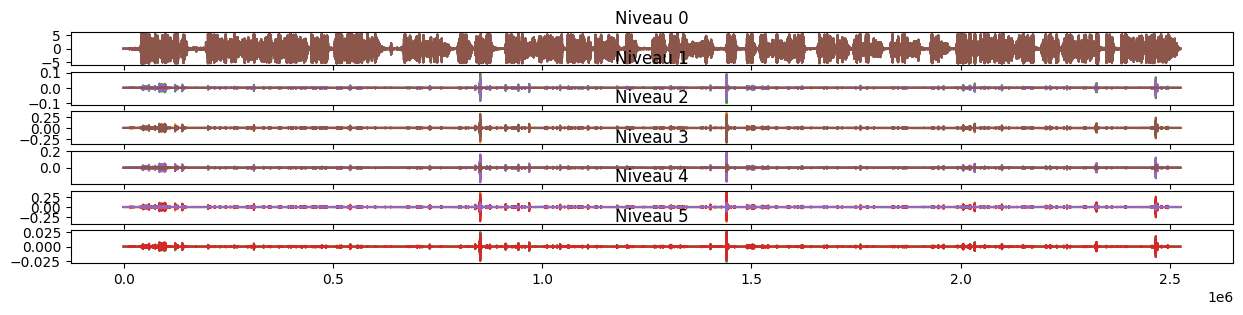

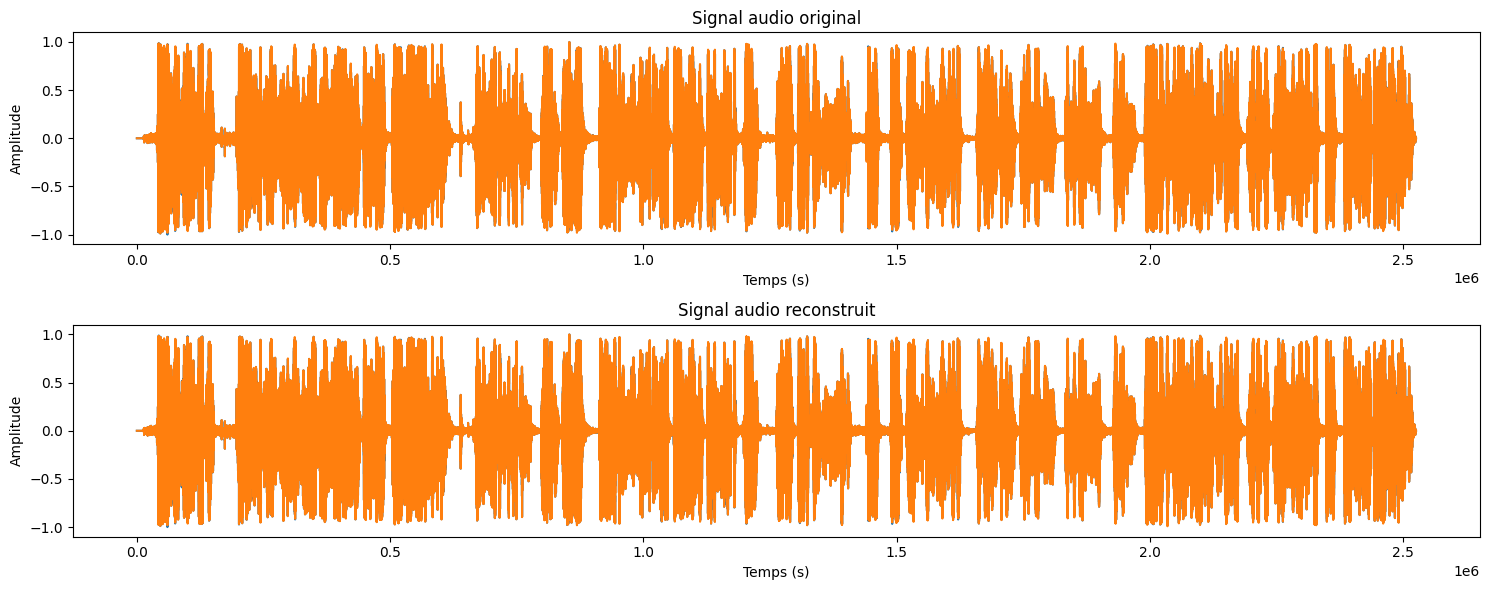

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Lecture du fichier audio
sample_rate, signal_audio = wavfile.read('/content/ياسين العمري الاستقامة #رمضان_كريم #ياسين_العمري.wav')

# Normalisation du signal
signal_audio = signal_audio / np.max(np.abs(signal_audio))

# Décomposition en coefficients d'ondelettes
level = 5 # nombre de niveaux de décomposition
wavelet = 'db4' # ondelette utilisée
coefficients = pywt.wavedec(signal_audio, wavelet, level=level)

# Plot des coefficients d'ondelettes
plt.figure(figsize=(15,3))
for i in range(level+1):
    plt.subplot(level+1,1,i+1)
    plt.plot(coefficients[i])
    plt.title("Niveau "+str(i))
plt.tight_layout()
plt.show()

# Reconstruction du signal audio à partir des coefficients d'ondelettes
reconstructed_signal = pywt.waverec(coefficients, wavelet)

# Plot du signal audio original et du signal audio reconstruit
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(signal_audio)
plt.title("Signal audio original")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.subplot(2,1,2)
plt.plot(reconstructed_signal)
plt.title("Signal audio reconstruit")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# La FFT (Transformée de Fourier rapide) 
* est une technique de traitement du signal numérique qui permet de transformer une série de données temporelles en une représentation fréquentielle. 
* elle permet de décomposer un signal en différentes fréquences qui le composent.
* La FFT est appelée "rapide" car elle utilise des algorithmes efficaces pour calculer la DFT en un temps raisonnable, même pour des signaux de grande taille.


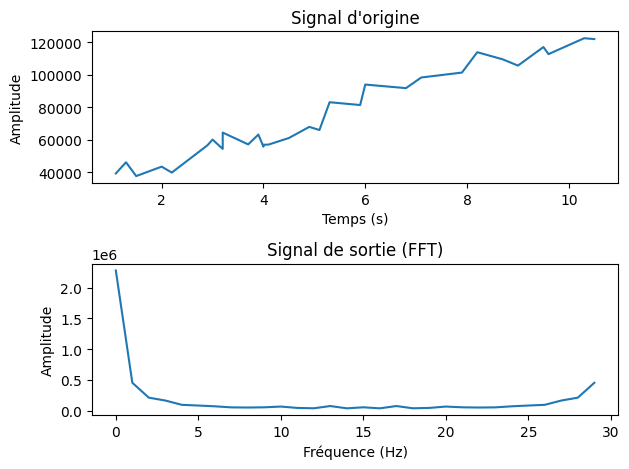

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données du fichier CSV en excluant la première ligne qui contient les en-têtes de colonne
data = pd.read_csv("/content/salary_data.csv", skiprows=1, header=None)

# Récupérer les valeurs de temps et d'amplitude
t = data.iloc[:, 0].values
x = data.iloc[:, 1].values

# Convertir les données en un tableau numpy de nombres réels
x = x.astype(float)

# Effectuer une transformée de Fourier rapide
y = np.fft.fft(x)

# Tracer le signal d'origine
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Signal d\'origine')

# Tracer le signal de sortie
plt.subplot(2, 1, 2)
plt.plot(np.abs(y))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Signal de sortie (FFT)')

plt.tight_layout()
plt.show()



# Les avantages de FFT
* Rapidité : Si vous devez analyser des signaux de grande taille, la FFT sera plus rapide que la DFT. Par exemple, si vous devez analyser un enregistrement audio de plusieurs minutes pour détecter des pics de fréquence, la FFT vous permettra de le faire en quelques secondes.

* Efficacité en mémoire : Si vous travaillez avec des données volumineuses, la FFT sera plus efficace en termes de stockage de données que la DFT. Par exemple, si vous devez stocker des données audio ou vidéo, la FFT vous permettra de le faire avec une quantité de stockage moindre.


* Filtrage de signal : Si vous devez éliminer les fréquences non désirées d'un signal ou en sélectionner des fréquences spécifiques, la FFT vous permettra de le faire. Par exemple, si vous analysez des données EEG, vous pouvez utiliser la FFT pour éliminer les fréquences indésirables comme les artefacts de mouvement.

* Compression de données : Si vous devez stocker ou transmettre de grandes quantités de données, la FFT peut être utilisée pour compresser les données. Par exemple, les fichiers MP3 sont compressés en utilisant la FFT pour réduire la quantité de données à stocker.


# Resumer

le choix entre les ondelettes et les FFC dépend de la nature du signal ou de l'image que l'on souhaite traiter et des objectifs de l'analyse ou de la compression. Les ondelettes sont généralement utilisées pour l'analyse de signaux non-stationnaires tels que les signaux EEG, les signaux sismiques ou les images avec des textures complexes. Les FFC sont souvent utilisées pour l'analyse de signaux stationnaires tels que les signaux audio ou vidéo, où les fréquences sont réparties de manière plus uniforme.
En ce qui concerne la compression, les ondelettes sont souvent utilisées pour la compression d'images, car elles permettent de réduire la taille de l'image en éliminant les détails fins. Les FFC sont largement utilisées dans la compression audio et vidéo, car elles permettent d'éliminer les hautes fréquences inaudibles ou imperceptibles.